In [1]:
%matplotlib inline

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
in_asos = pd.read_csv('./asos.csv')

In [5]:
in_asos

,station,valid,lon,lat,elevation,tmpf,dwpf,feel,sknt
0,HEY,2023-07-01 00:11,-85.6543,31.3460,97.00,87.8,71.6,94.18,0.0
1,SXS,2023-07-01 00:12,-85.8549,31.3612,122.26,87.8,71.6,94.18,0.0
2,HUA,2023-07-01 00:14,-86.6848,34.6786,209.00,89.6,77.0,102.54,5.0
3,8A0,2023-07-01 00:15,-86.2481,34.2316,317.00,86.0,73.4,93.45,0.0
4,4A6,2023-07-01 00:15,-86.0059,34.6887,198.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
62213,MOB,2023-07-29 23:56,-88.2456,30.6883,67.00,77.0,72.0,77.00,4.0
62214,GAD,2023-07-29 23:56,-86.0891,33.9727,173.00,91.0,76.0,103.14,6.0
62215,EKY,2023-07-29 23:56,-86.9263,33.3126,213.73,81.0,73.0,85.81,0.0
62216,EUF,2023-07-29 23:58,-85.1289,31.9513,87.00,90.0,77.0,103.11,4.0


In [14]:
in_asos_hot = in_asos[in_asos['tmpf']>80]

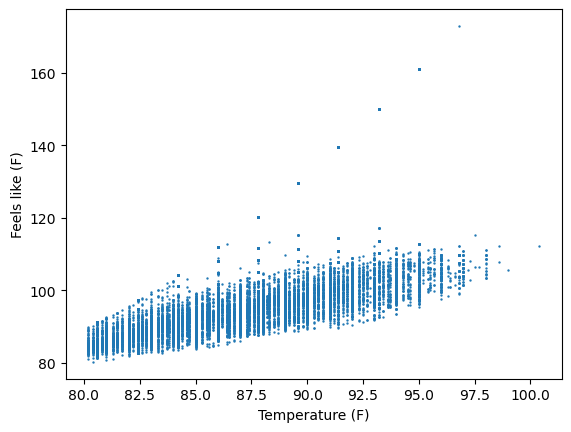

In [19]:
plt.scatter(in_asos_hot['tmpf'], in_asos_hot['feel'], s=0.5)
plt.xlabel("Temperature (F)")
plt.ylabel("Feels like (F)")
plt.savefig('basic_heat_vs_temp.png', dpi=300)

In [45]:
def loss_function_1(predictors, actual):
    return 1/(2*len(predictors))* np.sum(np.power(predictors-actual, 2))

In [46]:
#monte carlo
monte_carlo_runs = 1000
random_w0 = np.random.default_rng().uniform(low=-100, high=100, size=(monte_carlo_runs,))
random_w1 = np.random.default_rng().uniform(low=-100, high=100, size=(monte_carlo_runs,))
loss_function_output = np.empty(monte_carlo_runs)
for i, (w0, w1) in enumerate(zip(random_w0, random_w1)):
    predictors = w0 + w1*in_asos_hot['tmpf']
    loss_function_output[i] = loss_function_1(predictors, in_asos_hot['feel'])

Text(0, 0.5, 'Feels like (F)')

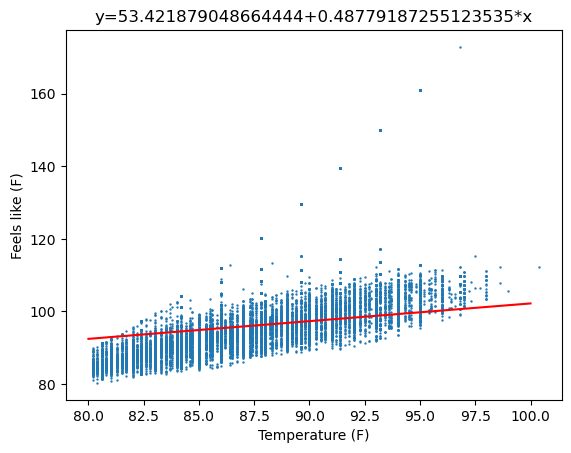

In [47]:
minimized_montecarlo = np.argmin(loss_function_output)
minimized_w0 = random_w0[minimized_montecarlo]
minimized_w1 = random_w1[minimized_montecarlo]
predictor_func = lambda x: minimized_w0 + minimized_w1*x
plt.scatter(in_asos_hot['tmpf'], in_asos_hot['feel'], s=0.5)
plt.plot([80, 100], [predictor_func(80), predictor_func(100)], color='r')
plt.title("y={0}+{1}*x".format(minimized_w0, minimized_w1))
plt.xlabel("Temperature (F)")
plt.ylabel("Feels like (F)")
#plt.savefig('basic_heat_vs_temp.png', dpi=300)

In [48]:
number_iterations = 1000
learning_rate = 0.0001
# initial weights
temp_w0 = 0
temp_w1 = 0


# loss function outputs
loss_outputs = np.empty(number_iterations)
w0_outputs = np.empty(number_iterations)
w1_outputs = np.empty(number_iterations)

num_values = len(in_asos_hot)
y_truth = in_asos_hot['feel']

for iteration_num in range(number_iterations):
    # calculate our predicted y values from our current weights
    y_hat = temp_w0 + temp_w1*in_asos_hot['tmpf']

    loss_outputs[iteration_num] = loss_function_1(y_hat, y_truth)
    
    d_loss_d_w0 = 1/num_values * np.sum(y_hat-y_truth)

    d_loss_d_w1 = 1/num_values * np.sum(in_asos_hot['tmpf']*(y_hat-y_truth))

    temp_w0 = temp_w0 - learning_rate * d_loss_d_w0
    temp_w1 = temp_w1 - learning_rate * d_loss_d_w1
final_w0_graddec = temp_w0
final_w1_graddec = temp_w1


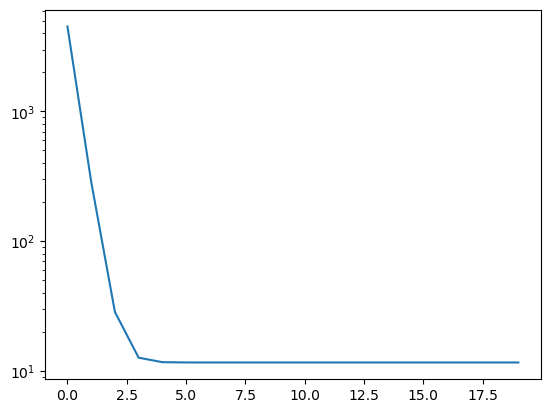

In [50]:
plt.semilogy(loss_outputs[:20])

In [ ]:
minimized_montecarlo = np.argmin(loss_function_output)
minimized_w0 = random_w0[minimized_montecarlo]
minimized_w1 = random_w1[minimized_montecarlo]
predictor_func = lambda x: minimized_w0 + minimized_w1*x
plt.scatter(in_asos_hot['tmpf'], in_asos_hot['feel'], s=0.5)
plt.plot([80, 100], [predictor_func(80), predictor_func(100)], color='r')
plt.title("y={0}+{1}*x".format(minimized_w0, minimized_w1))
plt.xlabel("Temperature (F)")
plt.ylabel("Feels like (F)")
#plt.savefig('basic_heat_vs_temp.png', dpi=300)

In [ ]:
def h(x,theta):
	return np.matmul(x, theta)
